# HW2：Pendulum
## 107022138 陳威伸
### Part A：Solving the pendulum

<font size = 4>  
> A-1 Euler method  
> A-2 Staggered algorithm  
> A-3 Velocity Verlet algorithm  
</font>

### Part B：Fidelity and Accuracy

### Part C：Stability and Period  


=========================================================================================================================

## Part A-1 Euler method
## Equation of motion
<font size = 4>
    $$ \frac{d^2\theta}{dt^2} = \ddot{\theta} = -ω_0^2sin(\theta)  $$
    <br><br>
    $$
    \dot{\theta}(t+dt) = \dot{\theta}(t) + \ddot{\theta}(t) dt
    $$<br>
    and the $\theta$ of next moment:<br><br>
    $$
    \theta(t+dt) = \theta(t)+\dot{\theta}(t)dt
    $$
</font>

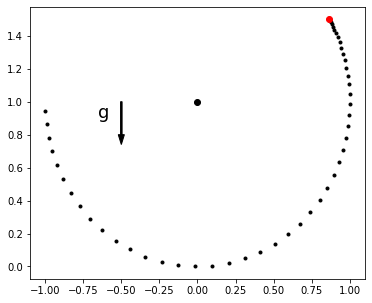

In [1]:
import numpy as np
import matplotlib.pyplot as plt

g = 9.8
L = 1
dt = 0.02
T = 1

N = int(T/dt)+1
θ = np.empty(N)
ω = np.empty(N)
α = np.empty(N)

θ[0] = 2/3*np.pi
ω[0] = 0
α[0] = -(g/L)*np.sin(θ[0])

for i in range(0,N-1):
    θ[i+1] = θ[i] + ω[i]*dt
    α[i+1] = -(g/L)*np.sin(θ[i+1])
    ω[i+1] = ω[i] + α[i]*dt
plt.figure(figsize=(6,5))
ax = plt.axes()

ax.plot(0,L,'ko')

x = L*np.sin(θ)
y = L*(1-np.cos(θ))
plt.plot(x,y,'k.')
plt.plot(x[0],y[0],'ro')
plt.arrow(-0.5,1,0,-0.2,head_width = 0.04,width = 0.01,color = 'k')
plt.text(-0.65,0.9,'g',fontsize = 18)
plt.savefig('fig1.pdf')

## Part A-2 Staggered algorithm
<font size = 4><br>
    $$
    \theta(t+dt) = \theta(t)+\dot{\theta}(t+dt)dt
    $$
</font>

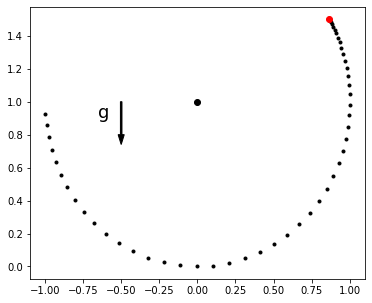

In [30]:
g = 9.8
L = 1
dt = 0.02
T = 1

N = int(T/dt)+1
θ = np.empty(N)
ω = np.empty(N)
α = np.empty(N)

θ[0] = 2/3*np.pi
ω[0] = 0
α[0] = -(g/L)*np.sin(θ[0])

for i in range(0,N-1):
    ω[i+1] = ω[i] + α[i]*dt
    θ[i+1] = θ[i]+ω[i+1]*dt
    α[i+1] = -(g/L)*np.sin(θ[i+1])
    
    
plt.figure(figsize=(6,5))
ax = plt.axes()

ax.plot(0,L,'ko')

x = L*np.sin(θ)
y = L*(1-np.cos(θ))
plt.plot(x,y,'k.')
plt.plot(x[0],y[0],'ro')
plt.arrow(-0.5,1,0,-0.2,head_width = 0.04,width = 0.01,color = 'k')
plt.text(-0.65,0.9,'g',fontsize = 18)
plt.savefig('fig2.pdf')

## Part A-3 Velocity Verlet algorithm
<font size = 4><br>
    $$
    \dot{\theta}(t+dt) = \dot{\theta}(t+dt/2) + \ddot{\theta}(t+dt)dt/2
    $$<br>
</font>

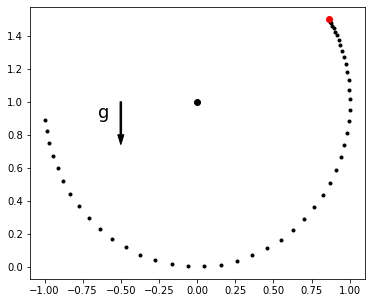

In [33]:
g = 9.8
L = 1
dt = 0.02
T = 1

N = int(T/dt)+1
θ = np.empty(N)
ω = np.empty(N)
α = np.empty(N)
ω2 = np.empty(N)

θ[0] = 2/3*np.pi
ω[0] = 0
α[0] = -(g/L)*np.sin(θ[0])
ω2[0]= 0

for i in range(0,N-1):
    ω2[i] = ω[i] + α[i]*dt/2
    θ[i+1] = θ[i] + ω2[i]*dt
    α[i+1] = -(g/L)*np.sin(θ[i+1])
    ω[i+1] = ω2[i] + α[i+1]*dt/2
    
    
plt.figure(figsize=(6,5))
ax = plt.axes()

ax.plot(0,L,'ko')

x = L*np.sin(θ)
y = L*(1-np.cos(θ))
plt.plot(x,y,'k.')
plt.arrow(-0.5,1,0,-0.2,head_width = 0.04,width = 0.01,color = 'k')
plt.text(-0.65,0.9,'g',fontsize = 18)
plt.plot(x[0],y[0],'ro')
plt.savefig('fig3.pdf')

## Part B Fidelity and Accuracy
<font size = 4><br>
For each of the method, plot the pendulum trajectory $\theta(t)$ for time step $dt=0.1$, $0.01$, and $0.001$. <br><br>Zoom in on the curve at $t=1$ and visually compare the values from the three time steps.
</font>

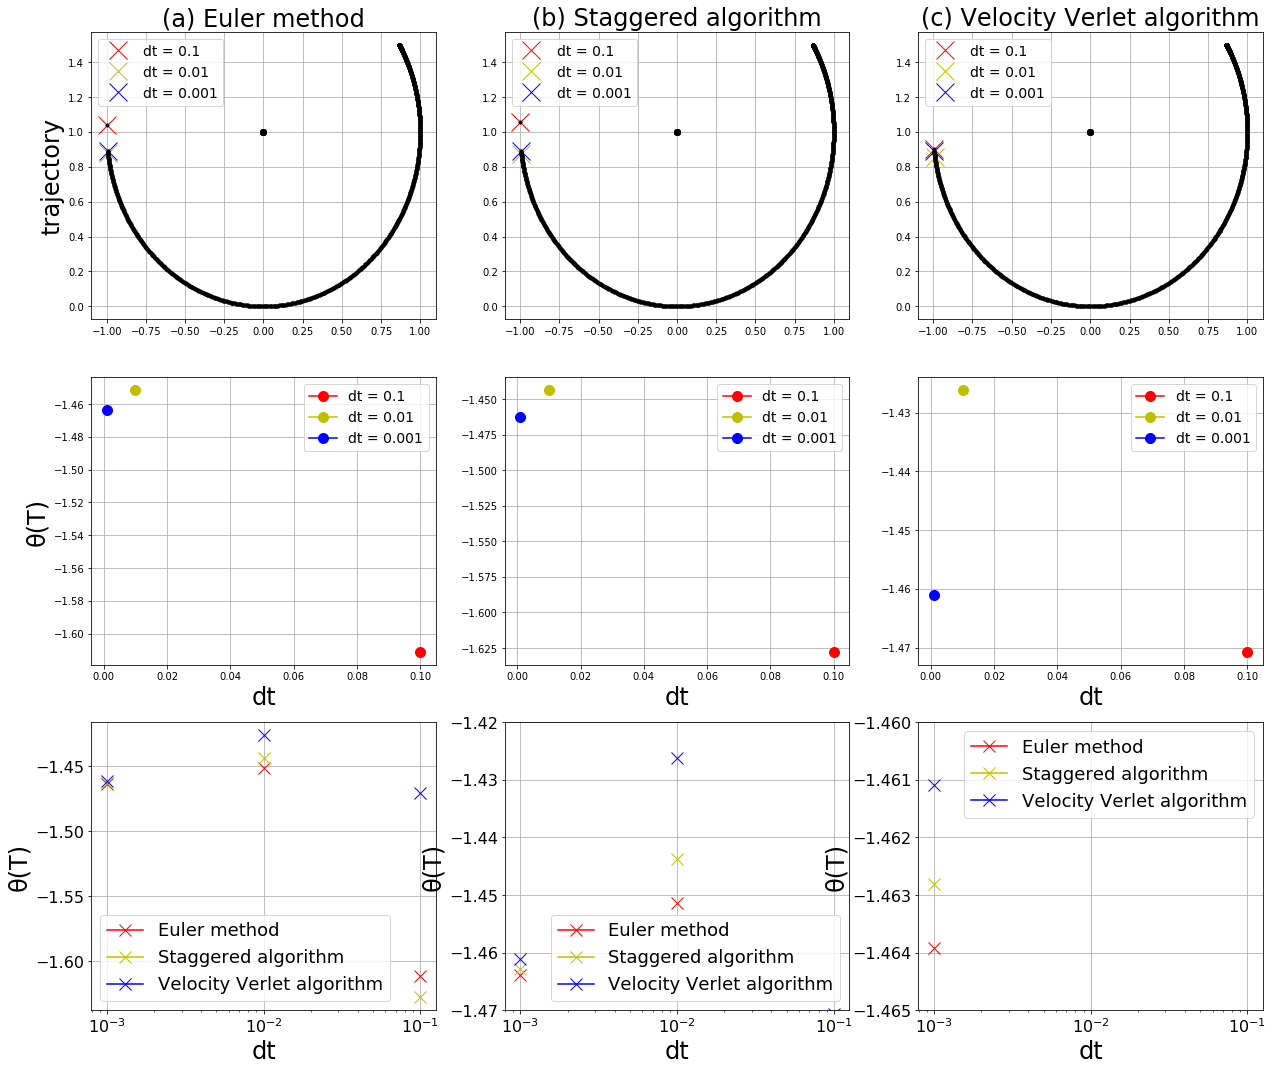

In [355]:
fig, axes = plt.subplots(ncols = 3 ,nrows = 3, figsize = (21,18))
ax = axes.flatten()

col = ['r','y','b']                                                        #these are plot parameters: 
lab = ['dt = 0.1','dt = 0.01','dt = 0.001']                                #color，label, title and marker
lab2 = ['Euler method','','','Staggered algorithm','','','Velocity Verlet algorithm','','']
tit = ['(a) Euler method','(b) Staggered algorithm','(c) Velocity Verlet algorithm']
tit2 = ['(d)','(e)','(f)','(g)','(h)','(i)']
mak = ['o','*','x']

for k in range(3):     # k is for defferent method
    for ii in range(3):    # ii is for defferent dt in the same method
        g = 9.8
        L = 1
        dt = 0.1*10**(-ii)
        T = 1

        N = int(T/dt)+1
        θ = np.empty(N)
        ω = np.empty(N)
        α = np.empty(N)
        ω2 = np.empty(N)
        
        θ[0] = 2/3*np.pi
        ω[0] = 0
        α[0] = -(g/L)*np.sin(θ[0])
        ω2[0]= 0

        if  k == 0:                   #Euler method
            for i in range(0,N-1):
                θ[i+1] = θ[i] + ω[i]*dt
                α[i+1] = -(g/L)*np.sin(θ[i+1])
                ω[i+1] = ω[i] + α[i]*dt
                
        elif k == 1:                  #Staggered algorithm
            for i in range(0,N-1):
                ω[i+1] = ω[i] + α[i]*dt
                θ[i+1] = θ[i]+ω[i+1]*dt
                α[i+1] = -(g/L)*np.sin(θ[i+1])
                
        else:                         #Velocity Verlet algorithm
            for i in range(0,N-1):
                ω2[i] = ω[i] + α[i]*dt/2
                θ[i+1] = θ[i] + ω2[i]*dt
                α[i+1] = -(g/L)*np.sin(θ[i+1])
                ω[i+1] = ω2[i] + α[i+1]*dt/2

        x = L*np.sin(θ)
        y = L*(1-np.cos(θ))
        ax[k].plot(x[N-1],y[N-1],'x',color = col[ii],label = lab[ii],markersize = 18)
        ax[k].plot(0,L,'ko')
        ax[k].plot(x,y,'k.')
        ax[k+3].plot(dt,θ[N-1],color = col[ii], marker = 'o',label = lab[ii],markersize = 10)
        ax[k].set_title(tit[k],fontsize = 24)

        ax[k+3].set_xlabel('dt',fontsize = 24)
        ax[6].plot(dt,θ[N-1],color = col[k], marker = 'x' ,label = lab2[k*3+ii],markersize = 12)
        ax[7].plot(dt,θ[N-1],color = col[k], marker = 'x' ,label = lab2[k*3+ii],markersize = 12)
        ax[8].plot(dt,θ[N-1],color = col[k], marker = 'x' ,label = lab2[k*3+ii],markersize = 12)
        
        ax[k].legend(fontsize = 14)
        ax[k+3].legend(fontsize = 14)
#         ax[k].axis('equal')
        
ax[6].legend(fontsize = 18)
ax[7].legend(fontsize = 18)
ax[8].legend(fontsize = 18)

ax[6].set_xlabel('dt',fontsize = 24)
ax[7].set_xlabel('dt',fontsize = 24)
ax[8].set_xlabel('dt',fontsize = 24)
# plt.axis('equal')

ax[6].set_ylabel('θ(T)',fontsize = 24)
ax[7].set_ylabel('θ(T)',fontsize = 24)
ax[8].set_ylabel('θ(T)',fontsize = 24)

ax[7].set_ylim([-1.47,-1.42])
ax[8].set_ylim([-1.465,-1.46])
ax[6].set_xscale('log')
ax[7].set_xscale('log')
ax[8].set_xscale('log')

ax[3].set_ylabel('θ(T)',fontsize = 24)
ax[0].set_ylabel('trajectory',fontsize = 24)

ax[6].tick_params(axis='both', which='major', labelsize=16)
ax[7].tick_params(axis='both', which='major', labelsize=16)
ax[8].tick_params(axis='both', which='major', labelsize=16)

for i in range(9):
    ax[i].grid()
# for i in range(6):
#     ax[i+3].set_title(' \n' + tit2[i],fontsize= 24)

# plt.subplots_adjust(left=0.125,
#                     bottom=0.1, 
#                     right=1.2, 
#                     top=1.2, 
#                     wspace=0.48, 
#                     hspace=0.35)

extent = ax[6].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('fig5-1.pdf', bbox_inches=extent.expanded(1.5, 1.3))
extent = ax[7].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('fig5-2.pdf', bbox_inches=extent.expanded(1.5, 1.3))
extent = ax[8].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('fig5-3.pdf', bbox_inches=extent.expanded(1.5, 1.3))

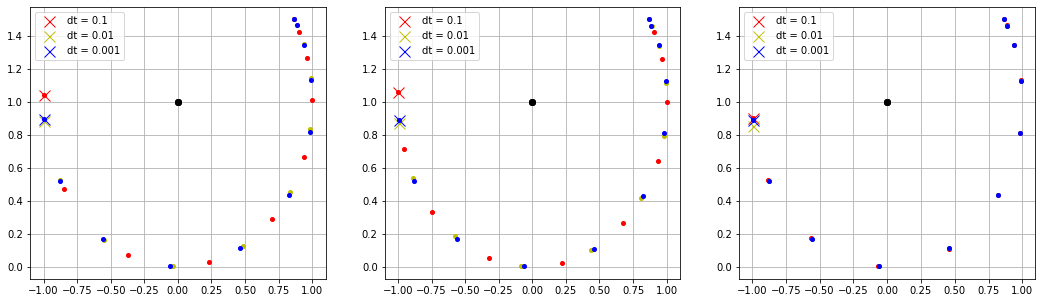

In [356]:
fig, axes = plt.subplots(ncols = 3 ,nrows = 1, figsize = (18,5))
ax = axes.flatten()

col = ['r','y','b']                                                        #these are plot parameters: 
lab = ['dt = 0.1','dt = 0.01','dt = 0.001']                                #color，label, title and marker
lab2 = ['Euler method','','','Staggered algorithm','','','Velocity Verlet algorithm','','']
tit = ['($a$) Euler method','($b$) Staggered algorithm','($c$) Velocity Verlet algorithm']
tit2 = ['(d)','(e)','(f)','(g)','(h)','(i)']
mak = ['o','*','x']

for k in range(3):     # k is for defferent method
    for ii in range(3):    # ii is for defferent dt in the same method
        g = 9.8
        L = 1
        dt = 0.1*10**(-ii)
        T = 1

        N = int(T/dt)+1
        θ = np.empty(N)
        ω = np.empty(N)
        α = np.empty(N)
        ω2 = np.empty(N)
        
        θ[0] = 2/3*np.pi
        ω[0] = 0
        α[0] = -(g/L)*np.sin(θ[0])
        ω2[0]= 0

        if  k == 0:                   #Euler method
            for i in range(0,N-1):
                θ[i+1] = θ[i] + ω[i]*dt
                α[i+1] = -(g/L)*np.sin(θ[i+1])
                ω[i+1] = ω[i] + α[i]*dt
                
        elif k == 1:                  #Staggered algorithm
            for i in range(0,N-1):
                ω[i+1] = ω[i] + α[i]*dt
                θ[i+1] = θ[i]+ω[i+1]*dt
                α[i+1] = -(g/L)*np.sin(θ[i+1])
                
        else:                         #Velocity Verlet algorithm
            for i in range(0,N-1):
                ω2[i] = ω[i] + α[i]*dt/2
                θ[i+1] = θ[i] + ω2[i]*dt
                α[i+1] = -(g/L)*np.sin(θ[i+1])
                ω[i+1] = ω2[i] + α[i+1]*dt/2

        x = L*np.sin(θ)
        y = L*(1-np.cos(θ))
        ax[k].plot(x[N-1],y[N-1],'x',color = col[ii],label = lab[ii],markersize = 11)
        ax[k].plot(0,L,'ko')
        ax[k].plot(x[::int(10**ii)],y[::int(10**ii)],'.',color = col[ii],markersize = 8)
    ax[k].grid()
    ax[k].legend(fontsize = 10)

extent = ax[0].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('fig4-1.pdf', bbox_inches=extent.expanded(1.15, 1.2))
extent = ax[1].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('fig4-2.pdf', bbox_inches=extent.expanded(1.15, 1.2))
extent = ax[2].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('fig4-3.pdf', bbox_inches=extent.expanded(1.15, 1.2))

<font size = 4>
    
</font>

<font size = 4>
    From the $dt$-$\theta (T)$ figure, <br><br>
    We can find the defferences of $\theta(T)$ using three method are less than $0.003$ for &nbsp;$ dt = 0.001$.<br><br>
    Now check if the trajectory cunverge as $dt$  &rarr; 0 <br><br>
    (using Velocity Verlet algorithm )
</font>

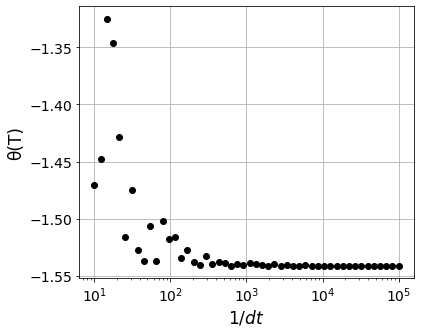

In [357]:
g = 9.8
L = 1
dt = np.logspace(-5,-1)
T = 1.024

plt.figure(figsize=(6,5))
ax = plt.axes()
θf = np.empty(50)

for k in range(50):
    N = int(T/dt[k])+1
    θ = np.empty(N)
    ω = np.empty(N)
    α = np.empty(N)
    ω2 = np.empty(N)

    θ[0] = 2/3*np.pi
    ω[0] = 0
    α[0] = -(g/L)*np.sin(θ[0])
    ω2[0]= 0

    for i in range(0,N-1):
        ω2[i] = ω[i] + α[i]*dt[k]/2
        θ[i+1] = θ[i] + ω2[i]*dt[k]
        α[i+1] = -(g/L)*np.sin(θ[i+1])
        ω[i+1] = ω2[i] + α[i+1]*dt[k]/2
    θf[k] = θ[N-1]
ax.plot(1/dt,θf,'o',color = 'k')
ax.set_xscale('log')
ax.set_xlabel('$1/dt$',fontsize = 17)
ax.set_ylabel('θ(T)',fontsize = 17)
ax.grid()
ax.tick_params(axis='both', which='major', labelsize=14)
# extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
# plt.savefig('fig6.pdf', bbox_inches=extent.expanded(1.5, 1.4))

<font size = 4>
    Here we can find if $ dt < 10^{-3} $ ,the final value of $\theta(T)$ seems to converge <br><br>
    However, for $dt>10^{-3}$, I think the main reason that effects the final value of $\theta$ is whether $T/dt$ is a integer or not.<br><br>
    If it's not a integer, the physical meaning of the simulation will be different:<br><br>
    they simulate defferent time intervals！<br><br>
    It is also the reason why I let $T = 1.024 $ &nbsp; instead of $1.000$,　I will compare the above result to the following case.
</font>

<IPython.core.display.Javascript object>


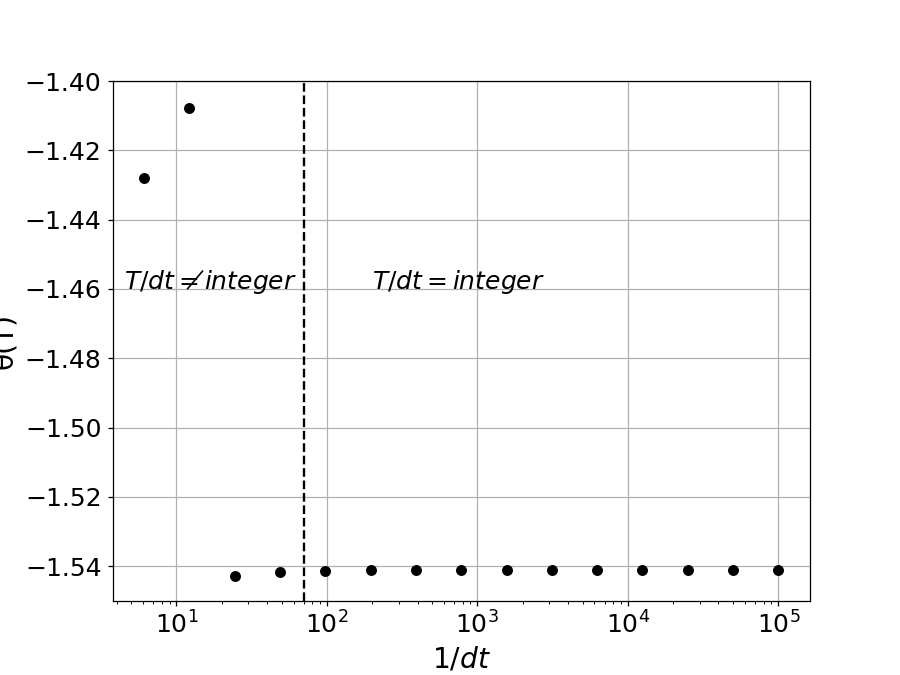

In [393]:
g = 9.8
L = 1
plt.figure(figsize=(8,6))
ax = plt.axes()
for ii in range(15):
    dt = 0.00001*2**ii
    T = 1.024

    N = int(T/dt)+1
    θ = np.empty(N)
    ω = np.empty(N)
    α = np.empty(N)
    ω2 = np.empty(N)

    θ[0] = 2/3*np.pi
    ω[0] = 0
    α[0] = -(g/L)*np.sin(θ[0])
    ω2[0]= 0

    for i in range(0,N-1):
        ω2[i] = ω[i] + α[i]*dt/2
        θ[i+1] = θ[i] + ω2[i]*dt
        α[i+1] = -(g/L)*np.sin(θ[i+1])
        ω[i+1] = ω2[i] + α[i+1]*dt/2
        
    ax.plot(1/dt,θ[N-1],'o',color = 'k')
ax.set_xscale('log')
ax.set_xlabel('$1/dt$',fontsize = 18)
ax.set_ylabel('θ(T)',fontsize = 18)

ax.plot([70,70],[-1.55,-1.40],'k--')
ax.set_ylim([-1.55,-1.40])
ax.text(2*10**2,-1.46,'$T/dt = integer$',fontsize = 16)
ax.text(4.5,-1.46,r'$T/dt =\not integer$',fontsize = 16)
plt.grid()
ax.tick_params(axis='both', which='major', labelsize=16)
# plt.savefig('fig6.pdf')
# extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
# plt.savefig('fig7.pdf', bbox_inches=extent.expanded(1.5, 1.4))

<font size = 4>
    The first four datas in the figure above is $ \frac{T}{dt} \not= integer$, where the other are integer ,<br><br>
    After those four points, the deferences between other points are less than 0.0002<br><br>
    $dt$ in the interval $(10^{-3},10^{-2})$ seems to be better than the previous fugure since it converges more quickly.
</font>

## Part C：Stability and Period
<font size =4><br>
    Assum that $\theta(0) = 0.001 $, $ \dot{\theta}(0) = 0$, and $T = 10$ <br><br>
    For each of the method, plot the pendulum trajectory $\theta(t)$ for time steps $dt_c=0.1, 0.2, ...., 0.8$
    
</font>

error for Euler method = 2114.01562%
error for Staggered algorithm = 0.17236%
error for Velocity Verlet algorithm = 0.01285%


Text(0, 0.5, 'trajectory (dt=0.1)')

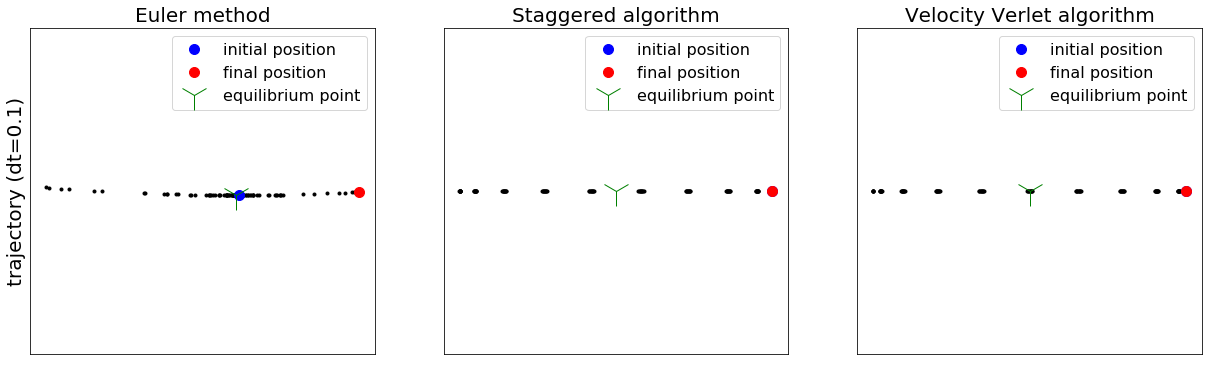

In [14]:
fig, axes = plt.subplots(ncols = 3 ,nrows = 1, figsize = (21,6))
ax = axes.flatten()

col = ['r','y','b']                                                        #these are plot parameters: 
lab = ['dt = 0.1','dt = 0.01','dt = 0.001']                                #color，label, title and marker
lab2 = ['Euler method','','','Staggered algorithm','','','Velocity Verlet algorithm','','']
tit = ['Euler method','Staggered algorithm','Velocity Verlet algorithm']   
mak = ['o','*','x']

Max = np.zeros(3)

for k in range(3):     # k is for defferent method
    g = 9.8
    L = 1
    dt = 0.1
    T = 10

    N = int(T/dt)+1
    θ = np.empty(N)
    ω = np.empty(N)
    α = np.empty(N)
    ω2 = np.empty(N)

    θ[0] = 0.001
    ω[0] = 0
    α[0] = -(g/L)*np.sin(θ[0])
    ω2[0]= 0

    if  k == 0:                   #Euler method
        for i in range(0,N-1):
            θ[i+1] = θ[i] + ω[i]*dt
            α[i+1] = -(g/L)*np.sin(θ[i+1])
            ω[i+1] = ω[i] + α[i]*dt

    elif k == 1:                  #Staggered algorithm
        for i in range(0,N-1):
            ω[i+1] = ω[i] + α[i]*dt
            θ[i+1] = θ[i]+ω[i+1]*dt
            α[i+1] = -(g/L)*np.sin(θ[i+1])

    else:                         #Velocity Verlet algorithm
        for i in range(0,N-1):
            ω2[i] = ω[i] + α[i]*dt/2
            θ[i+1] = θ[i] + ω2[i]*dt
            α[i+1] = -(g/L)*np.sin(θ[i+1])
            ω[i+1] = ω2[i] + α[i+1]*dt/2

    x = L*np.sin(θ)
    y = L*(1-np.cos(θ))
    
    ax[k].plot(x,y,'k.')
    ax[k].plot(x[0],y[0],'o',color = 'b',markersize = 10,label = 'initial position')
    ax[k].plot(x[N-1],y[N-1],'o',color = 'r',markersize = 10,label ='final position')
    ax[k].plot(0,0,'1',color = 'g',markersize = 30,label ='equilibrium point')
    ax[k].legend(fontsize = 16)
    ax[k].set_xticks([])
    ax[k].set_yticks([])
    ax[k].set_title(tit[k],fontsize = 20)
    ax[k].axis('equal')
    
    count = 0
    for i in range(0,N-1):
        if(ω[i]*ω[i+1]<0):
            if(np.abs(ω[i]) < np.abs(ω[i+1])):
                Max[k] = Max[k] + np.abs(θ[i] + ω[i]*(np.abs(ω[i]))/(np.abs(ω[i])+np.abs(ω[i+1]))/2*dt)
            elif(np.abs(ω[i]) > np.abs(ω[i+1])):
                Max[k] = Max[k] + np.abs(θ[i+1] + ω[i+1]*(np.abs(ω[i+1]))/(np.abs(ω[i+1])+np.abs(ω[i]))/2*dt)
            count = count + 1
    Max[k] = Max[k]/count
#     print(count)
    print('error for ' + tit[k] +' = '+ str('%.5f' %(np.abs(Max[k]-0.001)/0.001*100)) + '%')

ax[0].set_ylabel('trajectory (dt=' + str(dt)+')',fontsize = 20)
# extent = ax[2].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
# plt.savefig('fig10-3.pdf', bbox_inches=extent.expanded(1.1, 1.1))

<font size = 4>
    For Euler method:<br><br>
    $ dt_c = 0.2$<br><br>
    and at $ \frac{dt_c}{2} $ the amplitude error is about $ 2114 $% <br><br>
    For Staggered algorithm:<br><br>
    $ dt_c = 0.7$<br><br>
    and at $ \frac{dt_c}{2} $ the amplitude error is about $ 5.501 $% <br><br>
    For Velocity Verlet algorithm:<br><br>
    $ dt_c = 0.7$<br><br>
    and at $ \frac{dt_c}{2} $ the amplitude error is about $ 5.586 $% <br><br>
</font>

<IPython.core.display.Javascript object>


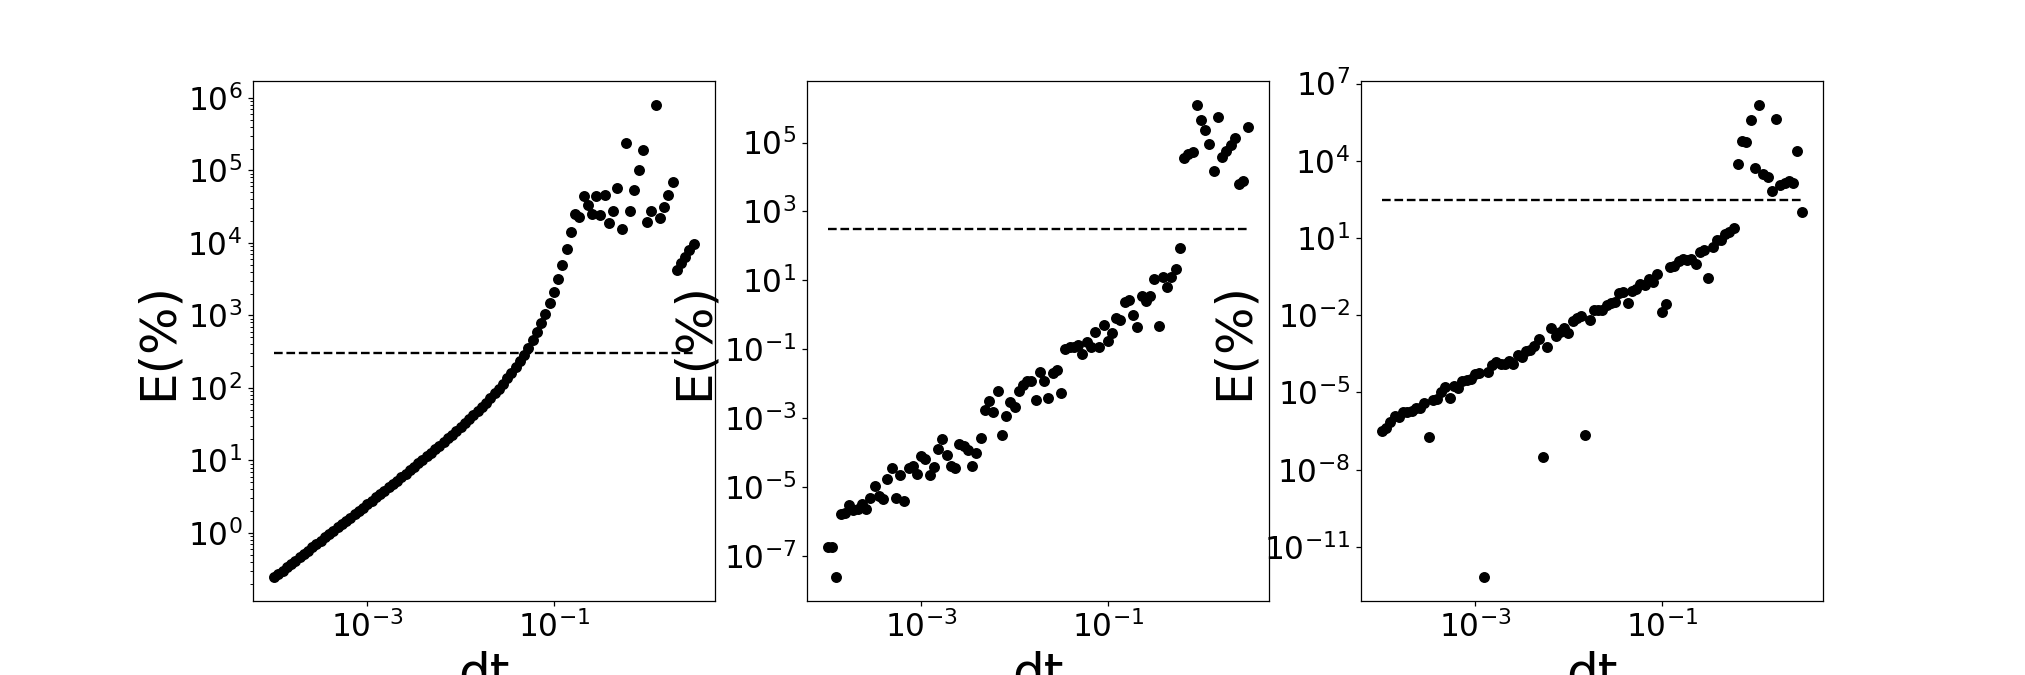

damn(2,99)


Text(0, 0.5, 'E(%)')

In [392]:
fig, axes = plt.subplots(ncols = 3 ,nrows = 1, figsize = (18,6))
ax = axes.flatten()

col = ['r','y','b']                                                        #these are plot parameters: 
lab = ['dt = 0.1','dt = 0.01','dt = 0.001']                                #color，label, title and marker
lab2 = ['Euler method','','','Staggered algorithm','','','Velocity Verlet algorithm','','']
tit = ['Euler method','Staggered algorithm','Velocity Verlet algorithm']   
mak = ['o','*','x']

Max = np.zeros([3,100])

for k in range(3):     # k is for defferent method
    for ii in range(100):    # ii is for defferent dt in the same method
        g = 9.8
        L = 1
        dt = np.logspace(-4,0.5,100)
        T = 10
        
#         print(dt)
        
        N = int(T/dt[ii])+1
        θ = np.empty(N)
        ω = np.empty(N)
        α = np.empty(N)
        ω2 = np.empty(N)
        
        θ[0] = 0.001
        ω[0] = 0
        α[0] = -(g/L)*np.sin(θ[0])
        ω2[0]= 0

        if  k == 0:                   #Euler method
            for i in range(0,N-1):
                θ[i+1] = θ[i] + ω[i]*dt[ii]
                α[i+1] = -(g/L)*np.sin(θ[i+1])
                ω[i+1] = ω[i] + α[i]*dt[ii]
                
        elif k == 1:                  #Staggered algorithm
            for i in range(0,N-1):
                ω[i+1] = ω[i] + α[i]*dt[ii]
                θ[i+1] = θ[i]+ω[i+1]*dt[ii]
                α[i+1] = -(g/L)*np.sin(θ[i+1])
                
        else:                         #Velocity Verlet algorithm
            for i in range(0,N-1):
                ω2[i] = ω[i] + α[i]*dt[ii]/2
                θ[i+1] = θ[i] + ω2[i]*dt[ii]
                α[i+1] = -(g/L)*np.sin(θ[i+1])
                ω[i+1] = ω2[i] + α[i+1]*dt[ii]/2

        count = 0
        for i in range(0,N-1):
            if(ω[i]*ω[i+1]<0):
#                 Max[k][ii] = Max[k][ii] + np.abs(θ[i]+θ[i+1])/2
                if(np.abs(ω[i]) < np.abs(ω[i+1])):
                    Max[k][ii] = Max[k][ii] + np.abs(θ[i] + ω[i]*(np.abs(ω[i]))/(np.abs(ω[i])+np.abs(ω[i+1]))/2*dt[ii])
                elif(np.abs(ω[i]) > np.abs(ω[i+1])):
                    Max[k][ii] = Max[k][ii] + np.abs(θ[i+1] + ω[i+1]*(np.abs(ω[i+1]))/(np.abs(ω[i+1])+np.abs(ω[i]))/2*dt[ii])
                count = count + 1
        if(count == 0):
            print('damn(' + str(k) + ','+ str(ii) + ')')
            continue
        
        Max[k][ii] = Max[k][ii]/count
#         print(Max[k][ii])
#         print(count)
#         print('error for ' + tit[k] +' = '+ str('%.4f' %((np.abs(Max[k][ii]-0.001)/0.001*100)) + '%'))
    ax[k].plot(dt,np.abs(Max[k]-0.001)/0.001*100,'o',color = 'k')
    ax[k].set_xlabel('dt',fontsize = 32)
#     ax[k].set_title(lab2[3*k],fontsize = 20)
    ax[k].plot([10**(-4),10**(0.5)],[3*10**2,3*10**2],'k--')
    ax[k].set_xscale('log')
    ax[k].set_yscale('log')
    ax[k].tick_params(axis='both', which='major', labelsize=20)
    
ax[0].set_ylabel('E(%)',fontsize = 32)
ax[1].set_ylabel('E(%)',fontsize = 32)
ax[2].set_ylabel('E(%)',fontsize = 32)
# print(Max)
# plt.subplots_adjust(left=0.125,
#                     bottom=0.1, 
#                     right=1.2, 
#                     top=1.2, 
#                     wspace=0.48, 
#                     hspace=0.35)
# extent = ax[0].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
# plt.savefig('fig11-1.pdf', bbox_inches=extent.expanded(1.45, 1.3))
# extent = ax[1].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
# plt.savefig('fig11-2.pdf', bbox_inches=extent.expanded(1.45, 1.3))
# extent = ax[2].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
# plt.savefig('fig11-3.pdf', bbox_inches=extent.expanded(1.45, 1.3))

<font size = 4>
    These figure above not only tell us the boundary of stable and unstable but also that the error for $dt \ll T$, the error is propotional to some power of dt.<br><br>
    As long as the error is greater than $ 3\times 10^2 $ %, the error turns out to be a discontinuous jump. One may consider that is the boundary between stable and unstable.
</font>

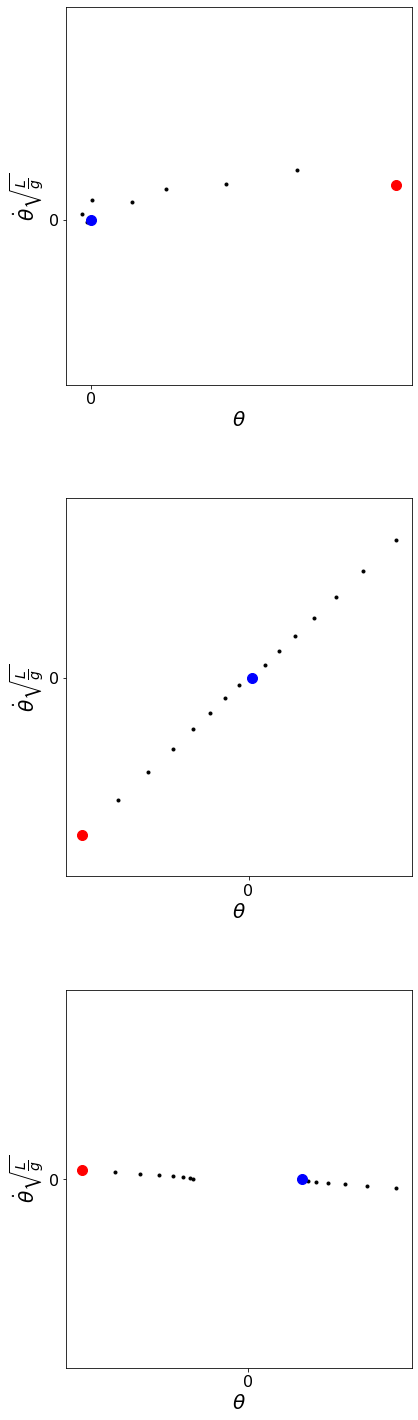

In [76]:
fig, axes = plt.subplots(ncols = 1 ,nrows = 3, figsize = (6,21))
ax = axes.flatten()

tit = ['Euler method','Staggered algorithm','Velocity Verlet algorithm']   

for k in range(3):     # k is for defferent method
    g = 9.8
    L = 1
    dt = 0.64
    T = 10

    N = int(T/dt)+1
    θ = np.empty(N)
    ω = np.empty(N)
    α = np.empty(N)
    ω2 = np.empty(N)

    θ[0] = 0.001
    ω[0] = 0
    α[0] = -(g/L)*np.sin(θ[0])
    ω2[0]= 0

    if  k == 0:                   #Euler method
        for i in range(0,N-1):
            θ[i+1] = θ[i] + ω[i]*dt
            α[i+1] = -(g/L)*np.sin(θ[i+1])
            ω[i+1] = ω[i] + α[i]*dt

    elif k == 1:                  #Staggered algorithm
        for i in range(0,N-1):
            ω[i+1] = ω[i] + α[i]*dt
            θ[i+1] = θ[i]+ω[i+1]*dt
            α[i+1] = -(g/L)*np.sin(θ[i+1])

    else:                         #Velocity Verlet algorithm
        for i in range(0,N-1):
            ω2[i] = ω[i] + α[i]*dt/2
            θ[i+1] = θ[i] + ω2[i]*dt
            α[i+1] = -(g/L)*np.sin(θ[i+1])
            ω[i+1] = ω2[i] + α[i+1]*dt/2
    
    ax[k].plot(θ,ω*np.sqrt(L/g),'k.')
    ax[k].plot(θ[0],ω[0]*np.sqrt(L/g),'bo',markersize = 10)
    ax[k].plot(θ[-1],ω[-1]*np.sqrt(L/g),'ro',markersize = 10)
    ax[k].axis('equal')
#     ax[k].set_title(tit[k] , fontsize = 20)
    ax[k].tick_params(axis='both', which='major', labelsize=16)
    ax[k].set_xlabel(r'$ \theta $' , fontsize = 20)
    ax[k].set_xticks([0])
    ax[k].set_yticks([0])
    ax[k].set_ylabel(r'$ \dot{\theta} \sqrt{\frac{L}{g}}$' , fontsize = 20)
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1, 
                    wspace=0.3, 
                    hspace=0.3)
extent = ax[2].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
plt.savefig('fig14-3.pdf', bbox_inches=extent.expanded(1.4, 1.25))

<font size = 4>
    In another point of view,if the phase diagram is not closed, than the pendulum simulation should be unstable.<br><br>
    Although $dt = 0.005$, the Euler method is still not aclosed curve(at least one's eyes can distinguish that from the figure). The Euler method may be not that good for this case！ <br><br>
    For the other two methods, the boundary is about $ dt = 0.64 $
    
</font>

## The Period

<font size = 4 >
    When the amplitude of the motion is small, one has $sin(\theta) \approx \theta $ and the period is given by $ \tau \approx \frac{2\pi}{\omega_0} = \tau_0 $, $ k = sin(\frac{\theta_0}{2})$<br><br>
    $$
    \tau = \frac{2}{\omega_0} \int^{\theta_0}_0 \frac{d\theta}{\sqrt{sin^2(\theta_0/2)-sin^2(\theta/2)}} = \frac{4}{\omega_0}\int^1_0 \frac{dt}{\sqrt{((1-t^2)(1-k^2t^2)}} = \frac{2\tau_0}{\pi}K(k)
    $$
    <br>
    where 
    $$ K(k) = \int_0^{\frac{\pi}{2}} \frac{d\theta}{\sqrt{1-k^2 \sin^2(\theta)} } = \int_0^1 \frac{dt}{\sqrt{(1-t^2)(1-k^2 t^2)} } 
    $$<br>
    $$
    \approx \frac{\pi}{2} \left[ 1 + \left( \frac{1}{2} \right)^2 k^2 + \left( \frac{1\cdot 3}{2\cdot 4} \right)^2 k^4 + \cdots \left( \frac{(2n-1)!!}{(2n)!!} \right)^2 k^{2n} + \cdots \right] 
    $$<br>
    $$
    \approx \frac{\pi}{2} \left[ 1 + \frac{1}{16}k^2 + \frac{9}{64} k^4 +\frac{225}{2304}k^6 \right]
    $$
    <br>
    is the complete elliptic integral of the first kind.
    
</font>

In [77]:
per = np.zeros([3,3])
tit = ['Euler method','Staggered algorithm','Velocity Verlet algorithm']

for k in range(3):     # k is for defferent method
    for ii in range(3):    # ii is for defferent dt in the same method
        g = 9.8
        L = 1
        dt = np.array([0.1,0.01,0.001])
        T = 30
        
        N = int(T/dt[ii])+1
        θ = np.empty(N)
        ω = np.empty(N)
        α = np.empty(N)
        ω2 = np.empty(N)
        
        θ[0] = 0.001
        ω[0] = 0
        α[0] = -(g/L)*np.sin(θ[0])
        ω2[0]= 0
        K = np.sin(θ[0]/2)
        tau = 2*np.pi*np.sqrt(L/g)*(1 + 1/16*K**2 + 9/64*K**4 + 225/2304*K**6)
        if k == 0 and ii == 0:
            print('exact period = ' + str('%.6f' %tau) + ' s')
        
        if  k == 0:                   #Euler method
            for i in range(0,N-1):
                θ[i+1] = θ[i] + ω[i]*dt[ii]
                α[i+1] = -(g/L)*np.sin(θ[i+1])
                ω[i+1] = ω[i] + α[i]*dt[ii]
                
        elif k == 1:                  #Staggered algorithm
            for i in range(0,N-1):
                ω[i+1] = ω[i] + α[i]*dt[ii]
                θ[i+1] = θ[i]+ω[i+1]*dt[ii]
                α[i+1] = -(g/L)*np.sin(θ[i+1])
                
        else:                         #Velocity Verlet algorithm
            for i in range(0,N-1):
                ω2[i] = ω[i] + α[i]*dt[ii]/2
                θ[i+1] = θ[i] + ω2[i]*dt[ii]
                α[i+1] = -(g/L)*np.sin(θ[i+1])
                ω[i+1] = ω2[i] + α[i+1]*dt[ii]/2

        count = 0
        for i in range(0,N-1):
            if(ω[i]*ω[i+1]<0):
                per[k][ii] = dt[ii]*(2*i+1)/2
                count = count + 1
                
        per[k][ii] = per[k][ii]/count*2

error = np.abs(tau-per)/tau*100
print('\n')
print('dt =     (0.1     , 0.01    , 0.001   ) s')

for k in range(3):
    print('period = (' + str('%.6f' %per[k][0]) + ', ' +str('%.6f' %per[k][1]) + ', ' + str('%.6f' %per[k][2]) + ') s ' + 'for ' + tit[k])

print('\n')
for k in range(3):
    print('error  = (' + str('%.6f' %error[k][0]) + ', ' +str('%.6f' %error[k][1]) + ', ' + str('%.6f' %error[k][2]) + ') % ' + 'for ' + tit[k])
    
# print(tau)
# print(per)
error = np.abs(tau-per)/tau*100
# print(error)

exact period = 2.007090 s


dt =     (0.1     , 0.01    , 0.001   ) s
period = (2.118750, 2.007931, 2.007069) s for Euler method
period = (1.996667, 2.007241, 2.007069) s for Staggered algorithm
period = (1.996667, 2.007241, 2.007069) s for Velocity Verlet algorithm


error  = (5.563281, 0.041905, 0.001046) % for Euler method
error  = (0.519323, 0.007544, 0.001046) % for Staggered algorithm
error  = (0.519323, 0.007544, 0.001046) % for Velocity Verlet algorithm
